In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


file_path = '/content/drive/My Drive/Crop yield/crop yield project.csv'
data = pd.read_csv(file_path)


print(data.head())

Mounted at /content/drive
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909  


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Cleaning the 'Season' column to remove leading/trailing whitespaces
if 'Season' in data.columns:
    data['Season'] = data['Season'].str.strip()

# Defining features (X) and target variable (y)
X = data.drop('Yield', axis=1)  # Features
y = data['Yield']  # Target variable

# Identifying categorical columns
categorical_cols = ['Crop', 'Season', 'State_Name']  # Include relevant columns
categorical_cols = [col for col in categorical_cols if col in X.columns]  # Ensure columns exist

# OneHotEncoding categorical columns to convert string to float
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(X[categorical_cols])

# Convert encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

# Drop original categorical columns from X
X = X.drop(categorical_cols, axis=1)

# Concatenate encoded columns back to X
X = pd.concat([X, encoded_df], axis=1)

# Ensuring all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert everything to numeric, replacing errors with NaN
X.fillna(0, inplace=True)  # Replace NaN values with 0 or handle appropriately

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initializing the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 9.575862136889022
Mean Squared Error: 21120.07463964349
R-squared: 0.9792888611318651


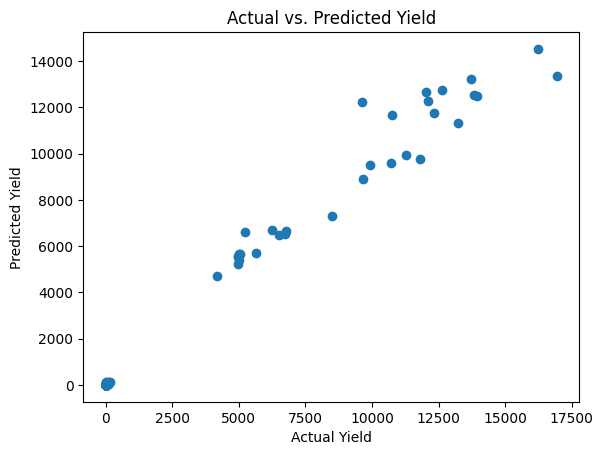

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs. Predicted Yield")
plt.show()

In [ ]:
# Getting individual predictions
first_prediction = y_pred[1]
print(first_prediction)

1.4193668809699995


In [ ]:
feature_importance = rf_model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.8f}")

Feature Importance:
Crop_Year: 0.00361947
State: 0.00000000
Area: 0.02679602
Production: 0.03582583
Annual_Rainfall: 0.03991194
Fertilizer: 0.01122920
Pesticide: 0.03605286
Crop_Arecanut: 0.00000001
Crop_Arhar/Tur: 0.00000005
Crop_Bajra: 0.00000033
Crop_Banana: 0.00000910
Crop_Barley: 0.00000000
Crop_Black pepper: 0.00000000
Crop_Cardamom: 0.00000000
Crop_Cashewnut: 0.00000045
Crop_Castor seed: 0.00000000
Crop_Coconut : 0.84612872
Crop_Coriander: 0.00000000
Crop_Cotton(lint): 0.00000016
Crop_Cowpea(Lobia): 0.00000000
Crop_Dry chillies: 0.00000003
Crop_Garlic: 0.00000016
Crop_Ginger: 0.00000052
Crop_Gram: 0.00000000
Crop_Groundnut: 0.00000000
Crop_Guar seed: 0.00000000
Crop_Horse-gram: 0.00000000
Crop_Jowar: 0.00000000
Crop_Jute: 0.00000046
Crop_Khesari: 0.00000000
Crop_Linseed: 0.00000000
Crop_Maize: 0.00000872
Crop_Masoor: 0.00000000
Crop_Mesta: 0.00000023
Crop_Moong(Green Gram): 0.00000000
Crop_Moth: 0.00000000
Crop_Niger seed: 0.00000000
Crop_Oilseeds total: 0.00000000
Crop_Onion: 0

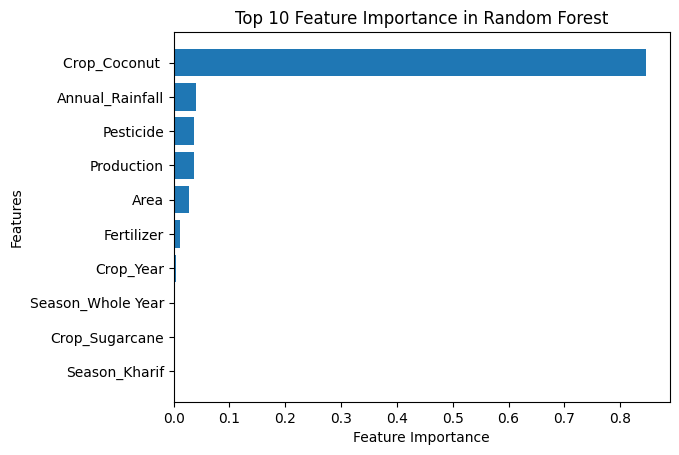

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get indices of top N features
top_n = 10  # Display top 10 features
indices = np.argsort(feature_importance)[-top_n:]

# Get top feature names and importance values
# Use X.columns instead of feature_names
top_feature_names = [X.columns[i] for i in indices]
top_feature_importance = feature_importance[indices]

# Plot top features
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(f'Top {top_n} Feature Importance in Random Forest')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# ... (Your existing code for data preprocessing and model initialization) ...

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator= rf_model, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# ... (Your existing code for model evaluation and prediction) ...

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  24.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  25.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  25.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  23.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  25.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  49.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  50.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  49.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  51.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  51.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time= 1.3min
[CV] END max_depth=None, 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

test_sizes = [0.1, 0.2, 0.3, 0.4]
rmse_values = []
r2_values = []

for test_size in test_sizes:
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
   rf_model = RandomForestRegressor(random_state=42)
   rf_model.fit(X_train, y_train)
   y_pred = rf_model.predict(X_test)
   rmse_values.append(np.sqrt(mean_squared_error(y_test, y_pred)))
   r2_values.append(r2_score(y_test, y_pred))
   print("RMSE values for test sizes", test_sizes, ":", rmse_values)

RMSE values for test sizes [0.1, 0.2, 0.3, 0.4] : [145.32747379502436]
RMSE values for test sizes [0.1, 0.2, 0.3, 0.4] : [145.32747379502436, 107.71535192155969]
RMSE values for test sizes [0.1, 0.2, 0.3, 0.4] : [145.32747379502436, 107.71535192155969, 327.3842468376078]
RMSE values for test sizes [0.1, 0.2, 0.3, 0.4] : [145.32747379502436, 107.71535192155969, 327.3842468376078, 286.71376375161174]


In [ ]:
# Assuming 'rf_model' is your trained RandomForestRegressor
predictions = rf_model.predict(X)  # Predict on the entire dataset (X)
data['Predicted_Yield'] = predictions  # Add a new column 'Predicted_Yield'
print(data[['Yield', 'Predicted_Yield']].head())  # Display actual and predicted yields

         Yield  Predicted_Yield
0     0.796087         0.803553
1     0.710435         0.760962
2     0.238333         0.294408
3  5238.051739      6771.958685
4     0.420909         0.456687


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


file_path = '/content/drive/My Drive/Crop yield/crop yield project.csv'
data = pd.read_csv(file_path)


true_target_values = data['Yield']
print(true_target_values)

Mounted at /content/drive
0           0.796087
1           0.710435
2           0.238333
3        5238.051739
4           0.420909
            ...     
19684       0.500000
19685       3.000000
19686       1.285000
19687       0.016667
19688       1.261818
Name: Yield, Length: 19689, dtype: float64
